In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation


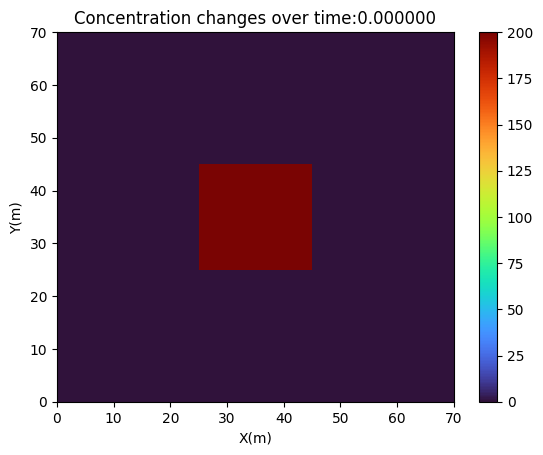

In [6]:
length=70;width=70 #設定湖泊中的觀察區域(此處假設為矩形)

number_of_iteration = 1000 #(迭代次數)

D=5.6   #diffusion coefficient
X_interval=Y_interval=1   #space interval(discrete)
Time_interval=(X_interval**2)/(4*D)   #time interval(discrete)   

C = np.zeros((number_of_iteration,width,length)) #設定格子點

Pollutants = 200 #釋放處的濃度

C[0,25:45,25:45].fill(Pollutants)  #初始條件

# 湖泊的邊界處濃度設為0
C[:,:,length-1] = 0
C[:,:,0] = 0
C[:,0,:] = 0
C[:,width-1,:] = 0

    

def ShowDiagram(C_tstep,tstep): #繪製出濃度圖
    plt.clf()
    plt.title(f'Concentration changes over time:{tstep*Time_interval:f}')
    plt.xlabel('X(m)');plt.ylabel('Y(m)')
    plt.pcolormesh(C_tstep, cmap=plt.cm.turbo, vmin=0, vmax=200)
    plt.colorbar()

    return plt

#Finite Difference Method:
for tstep in range(0, number_of_iteration-1, 1):
   for x in range(1,width-1,X_interval):
      for y in range(1,length-1,Y_interval):
         C[tstep + 1, x, y] = (D * Time_interval) / (X_interval ** 2) * (C[tstep][x+1][y] + C[tstep][x-1][y] + C[tstep][x][y+1] + C[tstep][x][y-1] - 4*C[tstep][x][y]) + C[tstep][x][y]

def animate(tstep): #動畫函數
    ShowDiagram(C[tstep],tstep)

#動畫播放
ani=animation.FuncAnimation(plt.figure(), animate, interval=5, frames=number_of_iteration, repeat=False)
ani.save("diffusion of pollutants in a lake.gif")